#  SVM 支持向量机
1. SVM支持向量机底层本质上是一个QP问题
2. SVM凸优化问题拥有对偶问题
3. SVM核函数应用在对偶问题中
3. SVM有2种不同的api调用
    1. LinearSVC - 底层使用的QP引擎是libsvm
    2. SVC - 底层使用的QP引擎是libsvc
4. 其中LinearSVC能够选择是否使用对偶问题进行求解，但是不能够使用核函数的方法进行求解
5. SVC能够指定核函数进行求解，kernal= 'rbf' 'poly'
## 线性SVM

In [5]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import datasets

In [47]:
iris = datasets.load_iris()

X = iris['data'][:,(2,3)] # petal length, petal width
y = (iris['target'] == 2).astype(np.int32)

svm_clf = Pipeline((
        ("scaler", StandardScaler()),
        ("linear_svc",LinearSVC(C=1, loss="hinge"))
))

svm_clf.fit(X, y)
svm_clf.predict([[5.5,  1.7]])

array([1], dtype=int32)

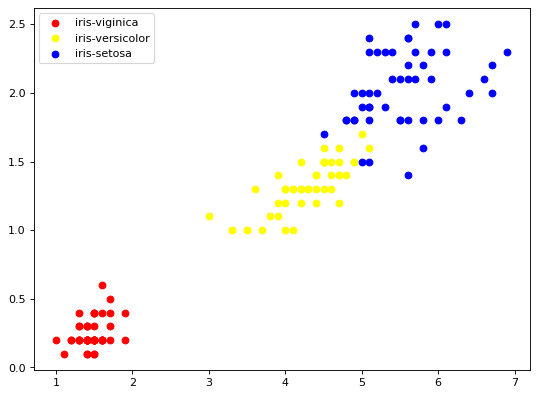

In [46]:
plt.figure(figsize=(8,6),dpi=80)
iris_0 = []
iris_1 = []
iris_2 = []
for index in range(len(y)):
    if y[index] == 0:
        iris_0.append(X[index,:].tolist())
    elif y[index] == 1:
        iris_1.append(X[index,:].tolist())
    else:
        iris_2.append(X[index,:].tolist())
iris_0 = np.array(iris_0)
iris_1 = np.array(iris_1)
iris_2 = np.array(iris_2)

plt.scatter(iris_0[:,0],iris_0[:,1],color='red',label="iris-viginica")
plt.scatter(iris_1[:,0],iris_1[:,1],color='yellow',label="iris-versicolor")
plt.scatter(iris_2[:,0],iris_2[:,1],color='blue',label="iris-setosa")
plt.legend()

## 非线性SVM

In [87]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons

X_moon, y_moon = make_moons()
X_moon = X_moon + 0.1 * np.random.normal(0, 1, X_moon.shape)

polynomial_svm_clf = Pipeline((
    ('poly_features', PolynomialFeatures(degree=3)),
    ('scaler', StandardScaler()),
    ('svm_clf', LinearSVC(C=10, loss='hinge',max_iter=10000,tol=0.01))
))

polynomial_svm_clf.fit(X_moon, y_moon)
polynomial_svm_clf.predict([[2,1]])

array([1])

In [200]:
def plot_moon_clf(model, X_moon, y_moon):
    class_0 = []
    class_1 = []
    for index in range(len(y_moon)):
        if y_moon[index] == 0:
            class_0.append(X_moon[index])
        else:
            class_1.append(X_moon[index])
    class_0 = np.array(class_0)
    class_1 = np.array(class_1)

    x_axis = np.arange(np.min(X_moon[:,0])-0.5,np.max(X_moon[:,0])+0.5,0.1)
    y_axis = np.arange(np.min(X_moon[:,1])-0.5,np.max(X_moon[:,1])+0.5,0.1)
    xx,yy = np.meshgrid(x_axis, y_axis)
    zz = np.zeros_like(xx)

    for la in range(len(x_axis)):
        for lb in range(len(y_axis)):
            zz[lb,la] = model.predict([[x_axis[la],y_axis[lb]]])

    plt.figure(figsize=(8,6),dpi=80)
    plt.contourf(xx,yy,zz, cmap = plt.cm.Spectral)
    plt.scatter(class_0[:,0],class_0[:,1],marker='3', color='orange',label='class 0')
    plt.scatter(class_1[:,0],class_1[:,1],marker='4', color='blue',label='class 1')
    plt.colorbar()
    plt.grid(alpha=0.2)
    plt.legend()

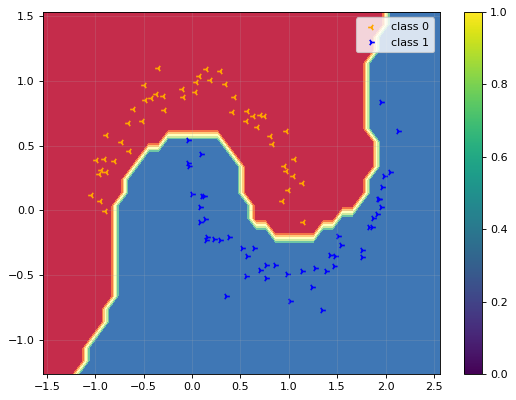

In [201]:
plot_moon_clf(polynomial_svm_clf, X_moon, y_moon)

## 核函数处理SVM

### 多项式核

In [115]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

poly_kernel_svm_clf = Pipeline((
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel='poly', degree=10, coef0=1, C=5))
))

poly_kernel_svm_clf.fit(X_moon, y_moon)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, degree=10, kernel='poly'))])

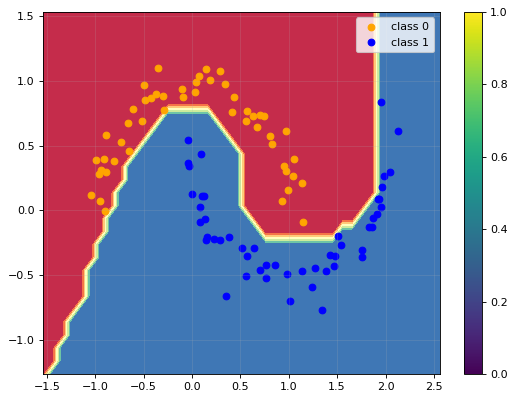

In [116]:
plot_moon_clf(poly_kernel_svm_clf, X_moon, y_moon)

### RBF核

#### RBF函数
1. Gaussian Radial Basis Function
$$
    \phi_{\gamma}(x,l) = exp(-\gamma {||x-l||}^{2})
$$
\* 注： $\gamma$是钟形函数参数 <br>
\*\* 注： $x$是变量，$l$是地标

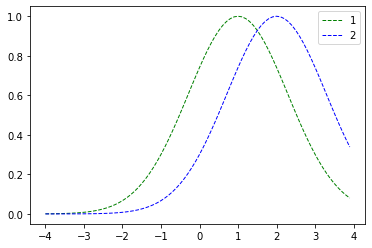

In [120]:
x_rbf = np.arange(-4,4,0.1)
l1 = 1
l2 = 2
y_rbf_1 = np.exp(-0.3 * (x-l1)**2)
y_rbf_2 = np.exp(-0.3 * (x-l2)**2)
plt.plot(x_rbf,y_rbf_1,lw=1,ls='--',color='green',label='1')
plt.plot(x_rbf,y_rbf_2,lw=1,ls='--',color='blue',label='2')
plt.legend()

#### RBF核
$\gamma$值变大使得钟形曲线变窄，作用到模型中即是每个样本的影响变小；<br>因此$\gamma$越大，评判边界越平滑，模型越可能出现过拟合

In [184]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

rbf_kernel_svm_clf = Pipeline((
    ('scaler', StandardScaler()),
    ('svm_clf', SVC(kernel='rbf', gamma=5, C=0.001, max_iter=1000, tol=0.001, probability=True))
))

rbf_kernel_svm_clf.fit(X_moon,y_moon)
rbf_kernel_svm_clf.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('svm_clf', SVC(C=0.001, gamma=5, max_iter=1000, probability=True))],
 'verbose': False,
 'scaler': StandardScaler(),
 'svm_clf': SVC(C=0.001, gamma=5, max_iter=1000, probability=True),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'svm_clf__C': 0.001,
 'svm_clf__break_ties': False,
 'svm_clf__cache_size': 200,
 'svm_clf__class_weight': None,
 'svm_clf__coef0': 0.0,
 'svm_clf__decision_function_shape': 'ovr',
 'svm_clf__degree': 3,
 'svm_clf__gamma': 5,
 'svm_clf__kernel': 'rbf',
 'svm_clf__max_iter': 1000,
 'svm_clf__probability': True,
 'svm_clf__random_state': None,
 'svm_clf__shrinking': True,
 'svm_clf__tol': 0.001,
 'svm_clf__verbose': False}

#### SVM 置信度
1. probability=True 能够将数据点距离分类平面的距离转化为置信度
2. 具体方法是：使用LR做k=5的CV，然后输出到predict_proba()与predict_log_proba()矩阵中

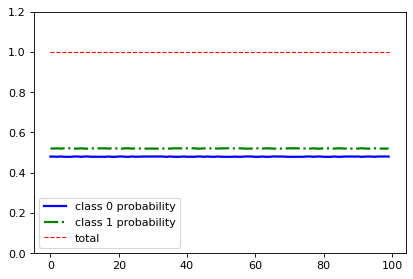

In [187]:
proba_moon = rbf_kernel_svm_clf.predict_proba(X_moon)

proba_moon_x = np.arange(len(proba_moon))
proba_moon_true = proba_moon[:,0]
proba_moon_false = proba_moon[:,1]

plt.figure(figsize=(6,4),dpi=80)
plt.plot(proba_moon_x, proba_moon_true, lw=2, ls='-', color='blue', label='class 0 probability')
plt.plot(proba_moon_x, proba_moon_false, lw=2, ls='-.', color='green', label='class 1 probability')
plt.plot(proba_moon_x, proba_moon_false + proba_moon_true, lw=1, ls='--', color='red', label='total')
plt.ylim([0,1.2])
plt.legend()

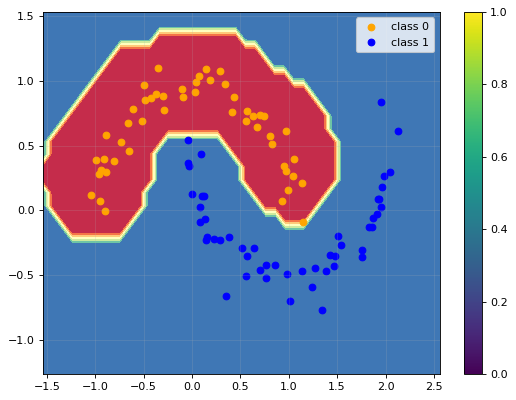

In [157]:
plot_moon_clf(rbf_kernel_svm_clf, X_moon, y_moon)

# SVR 支持向量机回归

$$
    y = 3x^2 + 4x +2
$$

In [144]:
from sklearn.svm import LinearSVR

x_svr = np.arange(-4,4,0.1)
y_svr = 3*x_svr**2 + 4*x_svr + 2 
y_svr_noise = y_svr + 2 * np.random.normal(0,1,x_svr.shape)
x_svr = x_svr.reshape(-1,1)

svm_reg = LinearSVR(epsilon=1.5, C=100, max_iter=10000)
svm_reg.fit(x_svr, y_svr_noise)

LinearSVR(C=100, epsilon=1.5, max_iter=10000)

In [153]:
from sklearn.svm import SVR

svm_poly_reg = SVR(kernel='poly', degree=2, C=10, epsilon=0.1)
svm_poly_reg.fit(x_svr, y_svr_noise)

SVR(C=10, degree=2, kernel='poly')

Text(0.5, 1.0, '$\\epsilon$=0.1 C=10')

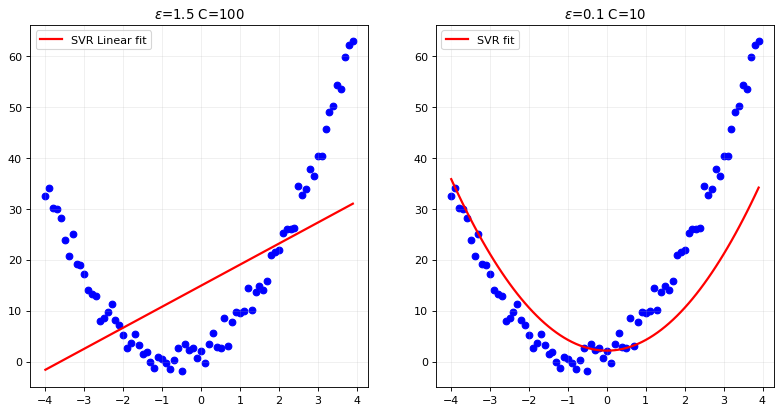

In [154]:
y_svr_pred = svm_reg.predict(x_svr)
y_svr_poly_pred = svm_poly_reg.predict(x_svr)

plt.figure(figsize=(12,6),dpi=80)
ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)
ax1.scatter(x_svr,y_svr_noise,color='b')
ax1.plot(x_svr, y_svr_pred, lw=2,ls='-',color='red',label='SVR Linear fit')
ax1.legend()
ax1.grid(alpha=0.2)
ax1.set_title(r'$\epsilon$=1.5 C=100')

ax2.scatter(x_svr,y_svr_noise,color='b')
ax2.plot(x_svr, y_svr_poly_pred, lw=2,ls='-',color='red',label='SVR fit')
ax2.legend()
ax2.grid(alpha=0.2)
ax2.set_title(r'$\epsilon$=0.1 C=10')

## Hinge 损失函数
$$
    hinge(x) = max(0, 1-x)
$$

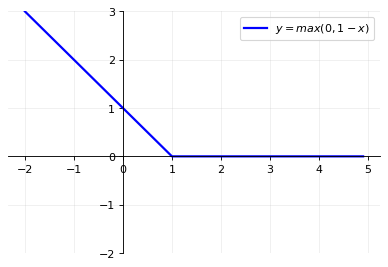

In [178]:
x_hinge = np.arange(-2,5,0.1)
y_hinge = np.array([max(0, i) for i in (1-x_hinge)],dtype=np.float64)

plt.figure(figsize=(6,4),dpi=80)
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.spines['bottom'].set_position(('data', 0))
ax.spines['left'].set_position(('data', 0))
plt.plot(x_hinge,y_hinge,lw=2,ls='-',color='b',label=r'$y=max(0, 1-x)$')
plt.ylim([-2,3])
plt.legend()
plt.grid(alpha=0.2)